In [42]:
from keras.datasets import imdb
import numpy as np

# DATA PREP

In [43]:
( (XT,YT), (xt,yt) )  = imdb.load_data(num_words = 10000)

In [44]:
wrds = imdb.get_word_index()

In [45]:
print ( len( wrds.items() )  ) 

88584


In [46]:
valtword = dict( [val,key] for key,val in wrds.items() )

In [47]:
actual_rev = ' '.join([valtword.get(idx-3,'#') for idx in XT[np.random.randint(100)]])
actual_rev

"# when i rented this movie i had very low expectations but when i saw it i realized that the movie was less a lot less than what i expected the actors were bad the doctor's wife was one of the worst the story was so stupid it could work for a disney movie except for the murders but this one is not a comedy it is a laughable masterpiece of stupidity the title is well chosen except for one thing they could add stupid movie after dead husbands i give it 0 and a half out of 5"

In [48]:
def vectorise (sentences,dims = 10000):
    m = len(sentences)
    print(m)
    vec = np.zeros((m,dims))
    for i in range(m):
        vec[ i, np.array(sentences[i]) ] = 1
    return vec
        

In [49]:
xtrain = vectorise(XT)
xtest = vectorise(xt)

25000
25000


In [50]:
ytrain = np.asarray(YT).astype('float')
ytest = np.asarray(yt).astype('float')

In [51]:
from keras import models
from keras.layers import Dense

In [70]:
mdl = models.Sequential()

Defining the model

In [71]:
mdl.add(Dense(16,activation='relu',input_shape = (10000,)))
mdl.add(Dense(16,activation='relu'))
mdl.add(Dense(1,activation= 'sigmoid'))

compliting the model

In [72]:
mdl.compile(optimizer='rmsprop',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
mdl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [74]:
xcv = xtrain[:5000]
ycv = ytrain[:5000]

xtrain_new = xtrain[5000:]
ytrain_new = ytrain[5000:]


In [75]:
hist = mdl.fit(xtrain_new,ytrain_new,epochs=20,batch_size = 256,validation_data = (xcv,ycv) )

Epoch 1/20
79/79 [==============================] - 3s 23ms/step - loss: 0.4213 - accuracy: 0.8415 - val_loss: 0.3111 - val_accuracy: 0.8772
Epoch 2/20
79/79 [==============================] - 1s 14ms/step - loss: 0.2301 - accuracy: 0.9164 - val_loss: 0.2846 - val_accuracy: 0.8862
Epoch 3/20
79/79 [==============================] - 1s 13ms/step - loss: 0.1763 - accuracy: 0.9374 - val_loss: 0.2819 - val_accuracy: 0.8880
Epoch 4/20
79/79 [==============================] - 1s 15ms/step - loss: 0.1448 - accuracy: 0.9481 - val_loss: 0.2954 - val_accuracy: 0.8880
Epoch 5/20
79/79 [==============================] - 1s 16ms/step - loss: 0.1208 - accuracy: 0.9582 - val_loss: 0.3288 - val_accuracy: 0.8800
Epoch 6/20
79/79 [==============================] - 1s 15ms/step - loss: 0.0995 - accuracy: 0.9650 - val_loss: 0.3466 - val_accuracy: 0.8828
Epoch 7/20
79/79 [==============================] - 1s 14ms/step - loss: 0.0837 - accuracy: 0.9726 - val_loss: 0.3887 - val_accuracy: 0.8800
Epoch 8/20
79

In [76]:
h = hist.history

In [77]:
import matplotlib.pyplot as plt

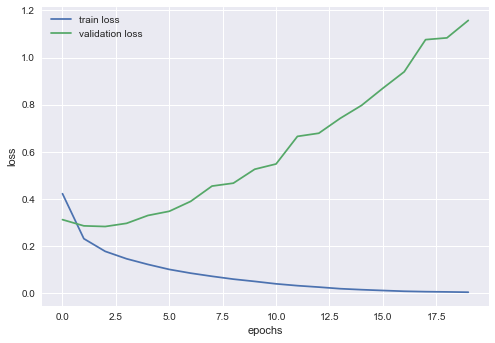

In [78]:
plt.style.use('seaborn')
plt.plot(h['loss'],label = 'train loss')
plt.plot(h['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [80]:
mdl.evaluate(xtest,ytest)[1]

782/782 [==============================] - 4s 4ms/step - loss: 1.3203 - accuracy: 0.8376


0.8375599980354309

In [81]:
mdl.evaluate(xtrain,ytrain)[1]

782/782 [==============================] - 4s 5ms/step - loss: 0.2322 - accuracy: 0.9719


0.9718800187110901

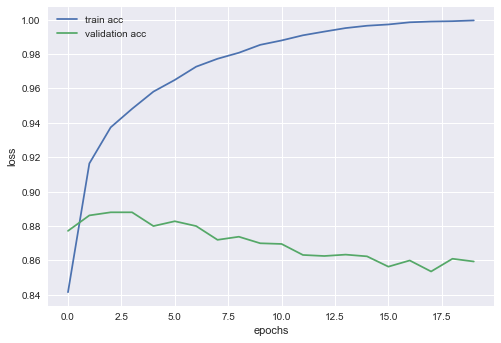

In [84]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label = 'train acc')
plt.plot(h['val_accuracy'],label = 'validation acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

After running till 4 epochs

In [85]:
hist = mdl.fit(xtrain_new,ytrain_new,epochs=4,batch_size = 256,validation_data = (xcv,ycv) )

Epoch 1/4
79/79 [==============================] - 2s 29ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 1.2190 - val_accuracy: 0.8576
Epoch 2/4
79/79 [==============================] - 1s 13ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 1.2839 - val_accuracy: 0.8590
Epoch 3/4
79/79 [==============================] - 1s 13ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.3689 - val_accuracy: 0.8582
Epoch 4/4
79/79 [==============================] - 1s 13ms/step - loss: 6.6691e-04 - accuracy: 0.9999 - val_loss: 1.4262 - val_accuracy: 0.8570


In [88]:
h = hist.history

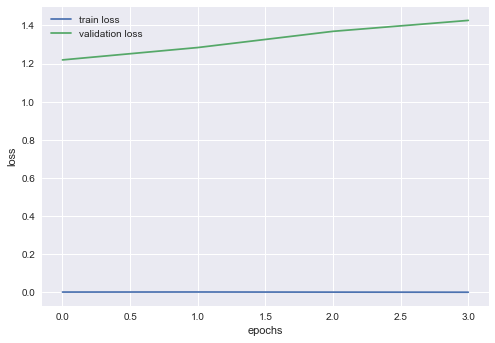

In [89]:
plt.style.use('seaborn')
plt.plot(h['loss'],label = 'train loss')
plt.plot(h['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [90]:
mdl.evaluate(xtest,ytest)[1]

782/782 [==============================] - 2s 3ms/step - loss: 1.6135 - accuracy: 0.8365


0.8364800214767456

In [91]:
mdl.evaluate(xcv,ycv)[1]

157/157 [==============================] - 0s 2ms/step - loss: 1.4262 - accuracy: 0.8570


0.8569999933242798

In [92]:
mdl.evaluate(xtrain,ytrain)[1]

782/782 [==============================] - 4s 5ms/step - loss: 0.2853 - accuracy: 0.9714


0.9714000225067139

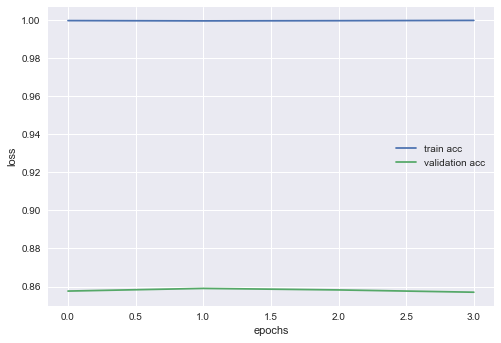

In [93]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label = 'train acc')
plt.plot(h['val_accuracy'],label = 'validation acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()